In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('tripadvisor_hotel_reviews.csv')

In [3]:
data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [4]:
def get_sub(text):
    return TextBlob(text).sentiment.subjectivity

In [5]:
data['subjectivivty'] = data['Review'].apply(get_sub)

In [6]:
def get_pola(text):
    return TextBlob(text).sentiment.polarity

In [7]:
data['polarity'] = data['Review'].apply(get_pola)

In [8]:
data

,Review,Rating,subjectivivty,polarity
0,nice hotel expensive parking got good deal sta...,4,0.687000,0.208744
1,ok nothing special charge diamond member hilto...,2,0.495009,0.214923
2,nice rooms not 4* experience hotel monaco seat...,3,0.605208,0.294420
3,"unique, great stay, wonderful time hotel monac...",5,0.691228,0.504825
4,"great stay great stay, went seahawk game aweso...",5,0.629396,0.384615
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,0.508586,0.221729
20487,great location price view hotel great quick pl...,4,0.622222,0.503704
20488,"ok just looks nice modern outside, desk staff ...",2,0.524304,0.171220
20489,hotel theft ruined vacation hotel opened sept ...,1,0.533441,0.122573


In [9]:
text = TextBlob('حال شما ')

In [10]:
text.detect_language()

'fa'

In [11]:
TextBlob('expensive').sentiment

Sentiment(polarity=-0.5, subjectivity=0.7)

In [12]:
all_word = ''.join([word for word in data['Review']])

In [13]:
wordcloud = WordCloud(width=500, height=300).generate(all_word)

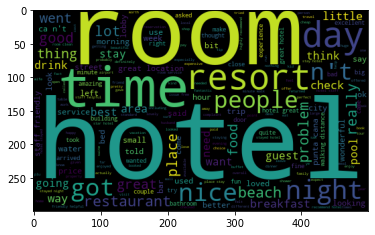

In [14]:
plt.imshow(wordcloud)

In [15]:
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Nuutral'
    else:
        return 'Positive'

In [16]:
data['score'] = data['polarity'].apply(analysis)

In [17]:
data['score'].value_counts()

Positive    19112
Negative     1356
Nuutral        23
Name: score, dtype: int64

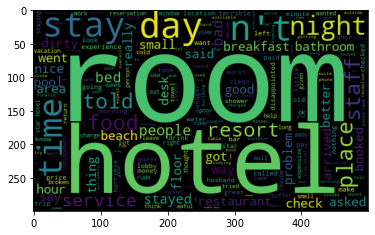

In [18]:
text_neg = data[data['score'] == 'Negative']['Review']
all_neg_word = ''.join([word for word in text_neg])
wordcloud_neg = WordCloud(width=500, height=300).generate(all_neg_word)
plt.imshow(wordcloud_neg)

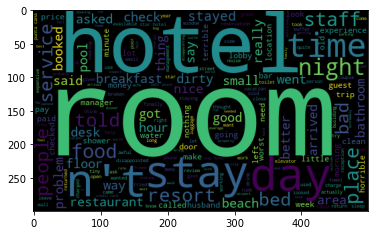

In [19]:
text_pos = data[data['score'] == 'Positive']['Review']
all_pos_word = ''.join([word for word in text_neg])
wordcloud_pos = WordCloud(width=500, height=300).generate(all_pos_word)
plt.imshow(wordcloud_pos)

In [20]:
data.describe()

,Rating,subjectivivty,polarity
count,20491.000000,20491.000000,20491.000000
mean,3.952223,0.588693,0.274278
std,1.233030,0.101521,0.181452
min,1.000000,0.000000,-1.000000
25%,3.000000,0.524130,0.177426
50%,4.000000,0.584638,0.280371
75%,5.000000,0.650000,0.384903
max,5.000000,1.000000,1.000000


In [21]:
def conv_textblob(text):
    return len(TextBlob(text).words)

In [22]:
data['counter'] = data['Review'].apply(conv_textblob)

In [27]:
data.drop(['Rating', 'subjectivivty', 'polarity', 'counter'],axis=1 ,inplace=True)

In [54]:
x = data['Review'].values
y = data['score'].values

In [55]:
z = [x + y]

In [56]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(z)

ValueError: too many values to unpack (expected 2)